In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.linalg import expm, logm
import pandas
import lsqfit
from scipy.optimize import curve_fit
import gvar as gv

load the files

In [2]:
data = pandas.read_csv('SarahData/simulation_production_run_on_ibmq_jakarta_data=2022-08-27_3qubits_cc4k6pr9k0hjph7mmrd0.csv')
data2 = pandas.read_csv('SarahData/simulation_production_run_on_ibmq_jakarta_data=2022-09-22_3qubits_632ccd160cfeefcb807de983.csv')

In [3]:
ddict = data2.to_dict()
ddict0 = data.to_dict()

In [4]:
len(data2['counts bare'])

1200

generate the readout correction matrxi

In [5]:
mats = np.zeros((3, 2, 2))
counts1 = eval(data2['counts bare'][1200])
counts2 = eval(data2['counts bare'][1201])
for key in counts1.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    print(key2)
    for j in range(3):
        if key2[j] == '0':
            mats[j, 0, 0] += counts1[key] / sum(counts1.values())
        else:
            mats[j, 0, 1] += counts1[key] / sum(counts1.values())
            
for key in counts2.keys():
    key2 = (np.binary_repr(int(key, 16), width=6))[:3]
    print(key2)
    for j in range(3):
        if key2[j] == '0':
            mats[j, 1, 0] += counts2[key] / sum(counts2.values())
        else:
            mats[j, 1, 1] += counts2[key] / sum(counts2.values())
        
print(mats)
reflect_mat = np.identity(1)
for j in range(3):
    reflect_mat = np.kron(reflect_mat, np.linalg.inv(mats[j]))

KeyError: 1200

generate the data for no mitigation

In [6]:

op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
op = op * op2

rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]

for i in range(1200):
    counts = eval(ddict0['counts bare'][i])
    if (i // 30) % 2 == 0:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolution_data[i // 60].append(value / sum(counts.values()))
    else:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[i // 60].append(value / sum(counts.values()))

generate data for readout and post selection

In [7]:

op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
op = op * op2

rescale_rops_data = [[] for j in range(20)]
evolution_rops_data = [[] for j in range(20)]

for i in range(1200):
    counts = eval(ddict0['counts mitigated'][i])
    if (i // 30) % 2 == 0:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolution_data[i // 60].append(value / sum(counts.values()))
    else:
        value = 0
        for key in counts.keys():
            ind = int(key, 16)
            key2 = np.binary_repr(ind, width=3)
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[i // 60].append(value / sum(counts.values()))

In [8]:
data2['counts bare'][30:60]

30    {'0x0': 441, '0x1': 80, '0x2': 116, '0x3': 473...
31    {'0x0': 415, '0x1': 67, '0x2': 109, '0x3': 497...
32    {'0x0': 414, '0x1': 59, '0x2': 80, '0x3': 499,...
33    {'0x0': 395, '0x1': 66, '0x2': 120, '0x3': 457...
34    {'0x0': 397, '0x1': 69, '0x2': 90, '0x3': 458,...
35    {'0x0': 370, '0x1': 58, '0x2': 103, '0x3': 468...
36    {'0x0': 366, '0x1': 64, '0x2': 82, '0x3': 481,...
37    {'0x0': 363, '0x1': 59, '0x2': 95, '0x3': 434,...
38    {'0x0': 463, '0x1': 61, '0x2': 110, '0x3': 527...
39    {'0x0': 434, '0x1': 55, '0x2': 108, '0x3': 531...
40    {'0x0': 376, '0x1': 71, '0x2': 97, '0x3': 499,...
41    {'0x0': 370, '0x1': 68, '0x2': 75, '0x3': 433,...
42    {'0x0': 385, '0x1': 64, '0x2': 95, '0x3': 442,...
43    {'0x0': 385, '0x1': 70, '0x2': 111, '0x3': 436...
44    {'0x0': 394, '0x1': 77, '0x2': 99, '0x3': 424,...
45    {'0x0': 426, '0x1': 54, '0x2': 122, '0x3': 491...
46    {'0x0': 389, '0x1': 64, '0x2': 103, '0x3': 458...
47    {'0x0': 388, '0x1': 77, '0x2': 94, '0x3': 

In [9]:
ddict['counts bare'][31]

"{'0x0': 415, '0x1': 67, '0x2': 109, '0x3': 497, '0x4': 40, '0x5': 425, '0x6': 378, '0x7': 69}"

In [10]:
np.binary_repr(0, width=3), np.binary_repr(6, width=3)

('000', '110')

In [57]:
set(list(data['counts mitigated']))

{"{'0x0': 0.08846104987106676, '0x1': 0.09549216928368347, '0x2': 0.14098792398795973, '0x3': 0.17172297148049892, '0x4': 0.09921319242808793, '0x5': 0.1233352287392614, '0x6': 0.15090098250181289, '0x7': 0.12988648170762884}",
 "{'0x0': 0.11705817614481794, '0x1': 0.10063809739091241, '0x2': 0.12806515920055178, '0x3': 0.15764965881301354, '0x4': 0.09472410593827836, '0x5': 0.10112472091556274, '0x6': 0.16047458533721926, '0x7': 0.14026549625964396}",
 "{'0x0': 0.12378364028292461, '0x1': 0.22937598087401515, '0x2': 0.10303791897690306, '0x3': 0.09887737018478981, '0x4': 0.16263659889632037, '0x5': 0.10371916959965409, '0x6': 0.09836783470176771, '0x7': 0.08020148648362513}",
 "{'0x0': 0.18894457060461842, '0x1': 0.12577833422563833, '0x2': 0.07921457434551074, '0x3': 0.10790365706831455, '0x4': 0.114198434780743, '0x5': 0.17756667167249793, '0x6': 0.11112351544513818, '0x7': 0.09527024185753874}"}

In [59]:
rescalend_data = [[] for j in range(20)]
evolutionnd_data = [[] for j in range(20)]
rescalendro_data = [[] for j in range(20)]
evolutionndro_data = [[] for j in range(20)]
rescale_data = [[] for j in range(20)]
evolution_data = [[] for j in range(20)]
rescale_ro_data = [[] for j in range(20)]
evolution_ro_data = [[] for j in range(20)]
for i in range(1200):
#     index1 = int(ddict['nt'][i]) - 1
    index1 = i // 60
    print(index1)
#     print(index1)
#     print(ddict['sim type'][i])
#     if ddict['sim type'][i] == 'evolution':
    counts = ddict['counts bare'][i]
    op2 = np.array([1 if np.binary_repr(k, width=3)[::2].count('1') % 2 == 1 else 0 for k in range(8)])
    op2 = np.array([0, 1, 0, 1, 1, 0, 1, 0])
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else -1 for k in range(8)])
    op = op * op2
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)
        norm = 0
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=7)
#             if key2[::2].count('1') % 2 == 1:
            norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        if norm == 0:
            evolution_data[index1].append(0)
        else:
            evolution_data[index1].append(value / norm)

#         for key in counts.keys():
#             key2 = np.binary_repr(int(key, 16), width=3)
#             vector[int(key, 16)] += counts[key]
#             if key2.count('1') % 2 == 0:
#                 value += counts[key]
#             else:
#                 value -= counts[key]
#             evolution_data[index1].append(value / sum(counts.values()))
        vector /= sum(vector)#sum(counts.values())
#         vector = reflect_mat @ vector
#         vector /= sum(vector)
        norm = sum(np.abs(op2 * vector))
        vector /= norm
        evolution_ro_data[index1].append(vector @ op)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key] / sum(counts.values())
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescale_data[index1].append(value / sum(counts.values()))
#         vector = reflect_mat @ vector
#         vector /= sum(vector)
        norm = sum(vector * op2)
        vector /= norm
        print(sum(vector))
#         print()
#         print(norm)
#         norm = sum(np.abs(op * vector))
        rescale_ro_data[index1].append(vector @ (op * vector))
#     break

    index1 = i // 60
    counts = ddict0['counts mitigated'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        norm = sum(counts.values())
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
#             print(key2[::2].count('1'))
#             if key2[::2].count('1') % 2 == 1:
#                 norm += counts[key]
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        if norm == 0:
            evolutionnd_data[index1].append(0)
        else:
            evolutionnd_data[index1].append(value / norm)
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        print(value)
        rescalend_data[index1].append(value / sum(counts.values()))
            
            
#     index1 = int(ddict0['nt'][i]) - 1
    counts = ddict0['counts bare'][i]
    op = np.array([1 if np.binary_repr(k, width=3).count('1') % 2 == 0 else 0 for k in range(8)])
    counts = eval(counts)
    if (i // 30) % 2 == 0:
        value = 0
        vector = np.zeros(8)

        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        evolutionndro_data[index1].append(value / sum(counts.values()))
    else:
        value = 0
        vector = np.zeros(8)
        for key in counts.keys():
            key2 = np.binary_repr(int(key, 16), width=3)
            vector[int(key, 16)] += counts[key]
            if key2.count('1') % 2 == 0:
                value += counts[key]
            else:
                value -= counts[key]
        rescalendro_data[index1].append(value / sum(counts.values()))
#     break
evolution_data = np.array(evolution_data).transpose()
rescale_data = np.array(rescale_data).transpose()
evolutionnd_data = np.array(evolutionnd_data).transpose()
rescalend_data = np.array(rescalend_data).transpose()
evolutionndro_data = np.array(evolutionndro_data).transpose()
rescalendro_data = np.array(rescalendro_data).transpose()
evolution_ro_data = np.array(evolution_ro_data).transpose()
rescale_ro_data = np.array(rescale_ro_data).transpose()

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2.0020020020020017
0.17107682958113823
0
2.0366598778004072
0.17107682958113823
0
1.9175455417066154
0.17107682958113823
0
2.0100502512562817
0.17107682958113823
0
1.9743336623889436
0.17107682958113823
0
1.9398642095053344
0.17107682958113823
0
1.9860973187686197
0.17107682958113823
0
1.9860973187686193
0.17107682958113823
0
2.024291497975708
0.17107682958113823
0
1.953125
0.17107682958113823
0
1.9212295869356388
0.17107682958113823
0
1.9267822736030829
0.17107682958113823
0
2.051282051282051
0.17107682958113823
0
1.9267822736030829
0.17107682958113823
0
2.0040080160320644
0.17107682958113823
0
2.0120724346076457
0.17107682958113823
0
2.01816347124117
0.17107682958113823
0
1.9569471624266144
0.17107682958113823
0
1.9249278152069296
0.17107682958113823
0
1.9305019305019304
0.17107682958113823
0
2.05761316872428
0.17107682958113823
0
2.0833333333333335
0.17107682958113823
0
2.1367521367521367
0.17107682958113823
0
2.061855670

0.06884046518528
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
1.7316017316017316
0.06884046518528
11
1.8832391713747647
0.06884046518528
11
1.7969451931716083
0.06884046518528
11
1.8231540565177757
0.06884046518528
11
1.8281535648994518
0.06884046518528
11
1.8365472910927456
0.06884046518528
11
1.8467220683287169
0.06884046518528
11
1.8726591760299627
0.06884046518528
11
1.9455252918287937
0.06884046518528
11
1.9157088122605364
0.06884046518528
11
1.9627085377821394
0.06884046518528
11
1.7636684303350971
0.06884046518528
11
1.8018018018018016
0.06884046518528
11
1.8484288354898342
0.06884046518528
11
1.8814675446848537
0.06884046518528
11
1.8744142455482657
0.06884046518528
11
1.855287569573284
0.06884046518528
11
1.8570102135561748
0.06884046518528
11
1.8570102135561748
0.06884046518528
11
1.8639328984156573
0.06884046518528
11
1.8001800180018004
0.06884046518528
11
1.8501387604070307
0.06884046518528
11
1.858736059479554
0.0688404651852

In [60]:
for j in range(20):
    print(len(rescalendro_data[j]))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [61]:
colorsrgb = [(0, 0, 0), (230, 159, 0), (86, 180, 233),
          (0, 158, 115), (240, 228, 66), (0, 114, 178),
          (213, 94, 0), (204, 121, 167)]
colors = [tuple([el / 255 for el in c]) for c in colorsrgb]

import matplotlib as mpl
from  matplotlib import rc
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "Times New Roman"
mpl.rcParams.keys()
# mpl.rcParams["text.fontset"] = "Times New Roman"
mpl.rcParams["mathtext.fontset"] = "stix"
# rc('text', usetex=True)

In [62]:
rdata = gv.gvar(np.mean(rescale_data, axis=0), np.std(rescale_data, axis=0) / np.sqrt(30))
edata = gv.gvar(np.mean(evolution_data, axis=0), np.std(evolution_data, axis=0) / np.sqrt(30))
rdatand = gv.gvar(np.mean(rescalend_data, axis=0), np.std(rescalend_data, axis=0) / np.sqrt(30))
edatand = gv.gvar(np.mean(evolutionnd_data, axis=0), np.std(evolutionnd_data, axis=0) / np.sqrt(30))
edataro = gv.gvar(evolutionnd_data[7], np.sqrt((1 - evolutionnd_data[7] ** 2) / 2000))
rdatandro = gv.gvar(np.mean(rescalendro_data, axis=0), np.std(rescalendro_data, axis=0) / np.sqrt(30))
edatandro = gv.gvar(np.mean(evolutionndro_data, axis=0), np.std(evolutionndro_data, axis=0) / np.sqrt(30))
edatanothing = gv.gvar(evolutionndro_data[0], np.sqrt((1 - evolutionndro_data[0] ** 2) / 2000))
r_ro_data = gv.gvar(np.mean(rescale_ro_data, axis=0), np.std(rescale_ro_data, axis=0) / np.sqrt(30))
e_ro_data = gv.gvar(np.mean(evolution_ro_data, axis=0), np.std(evolution_ro_data, axis=0) / np.sqrt(30))

In [63]:
gv.dump(edata_r, '3qubitparams2.gv')

'3qubitparams2.gv'

In [64]:
edata
# e_ro_data_r = e_ro_data / r_ro_data

array([-0.013(11), -0.6423(43), 0.0699(80), 0.5590(60), -0.1207(83),
       -0.5102(37), 0.1972(67), 0.4463(54), -0.1930(76), -0.3391(66),
       0.1662(54), 0.2493(55), -0.1576(59), -0.2050(51), 0.1642(49),
       0.1722(78), -0.2152(53), -0.1101(60), 0.2011(58), 0.0733(54)],
      dtype=object)

In [65]:
x = np.array([[0, 1], [1, 0]], dtype='complex128')
y = np.array([[0, 1j], [-1j, 0]], dtype='complex128')
z = np.diag(np.array([1, -1], dtype='complex128'))
hfh = np.kron(x, np.kron(z, x))
hfh += np.kron(y, np.kron(z, y))
hfh /= 4
hmt = [(-1) ** (i // 2) * np.kron(np.identity(2 ** i), np.kron(z, np.identity(2 ** (2 - i)))) / 2  for i in [0, 2]]
hgt = np.kron(np.identity(2), np.kron(x, np.identity(2))) / 2
from scipy.linalg import expm

t1 = expm(-1.0j * 6 / 20 * hgt)
t2 = [expm(-1.0j * 6 / 20 * el) for el in hmt]
t3 = expm(-1.0j * 6 / 10 * hfh)

istate1 = np.kron(np.array([1, 0]), np.kron(np.array([1, -1]), np.array([0, 1]))) / np.sqrt(2)
istate2 = np.kron(np.array([0, 1]), np.kron(np.array([1, 1]), np.array([1, 0]))) / np.sqrt(2)
vec = (istate1 + istate2) / np.sqrt(2)
# print(istate)
op = np.kron(x, np.kron(z, x))
# print(op)
obs = []
for j in range(20):
    vec = t2[0] @ t2[1] @ t1 @ t3 @ t2[0] @ t2[1] @ t1 @ vec
#     print(vec)
    obs.append(vec.conjugate().transpose() @ op @ vec )
print(obs)

[(0.8405894386191685+0j), (0.4688679039971496+0j), (0.13320109969599475+0j), (0.05786476507380725+0j), (0.2931948640430679+0j), (0.6819556161713629+0j), (0.9643965665440016+0j), (0.951804824406982+0j), (0.6525935609211109+0j), (0.26668074975160516+0j), (0.05191399436643496+0j), (0.15178967938376875+0j), (0.49957587655173574+0j), (0.862899275465747+0j), (0.9990053860379711+0j), (0.8169549250607826+0j), (0.4383848885461874+0j), (0.11623680586257776+0j), (0.06575388396657689+0j), (0.32066628171841305+0j)]


In [66]:
h1 = np.array([[0, 1], [1, 0]]) * 0.25
h2 = np.array([[0.5 + 2, 0], [0, -0.5 - 2]]) 
evo1 = expm(-6j / 20 * h1)
evo2 = expm(-6j / 40 * h2)
istate = np.array([1, 1]) / np.sqrt(2)
op = np.array([[0, 1], [1, 0]])
observe = np.zeros(21)
for i in range(21):
    observe[i] += istate.conjugate().transpose() @ op @ istate
    istate = evo2 @ istate
    istate = evo1 @ istate
    istate = evo2 @ istate
print(observe)

evo2 @ evo1 @ evo2


[ 1.          0.07595451 -0.96770975 -0.17876784  0.96702589  0.32640832
 -0.90231411 -0.4207561   0.87030458  0.5558759  -0.77588794 -0.63385766
  0.71629216  0.74904037 -0.59687016 -0.80384807  0.51526892  0.89300809
 -0.37721013 -0.91938054  0.28065308]


C:\Users\gusta\AppData\Local\Temp\ipykernel_12992\1107134236.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  observe[i] += istate.conjugate().transpose() @ op @ istate


array([[0.72963196-0.67972255j, 0.        -0.07492971j],
       [0.        -0.07492971j, 0.72963196+0.67972255j]])

In [67]:
obs = np.array([ 0.07578, -0.96702, -0.1758 ,  0.9678 ,  0.32258, -0.90242,
       -0.4158 ,  0.86662,  0.555  , -0.77342, -0.6338 ,  0.71924,
        0.75256, -0.5955 , -0.8066 ,  0.51404,  0.89394, -0.37858,
       -0.92314,  0.27712])

NameError: name 'edatand_r' is not defined

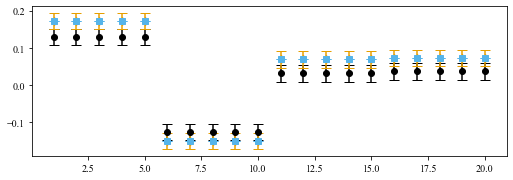

In [68]:
plt.figure(figsize=(8.5, 11 / 4))
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
             label='no mitigation')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro), yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
             label='RO + PS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand), yerr=gv.sdev(edatand), fmt='s', color=colors[2], capsize=5,
             label='RO + PS + PT')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
             color=colors[3], capsize=4, label='RO+PS+PT+RS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(e_ro_data_r), yerr=gv.sdev(edata_r), fmt='^', 
             color=colors[5], capsize=4, label='DD+RO+PS+PT+RS')
# plt.plot(np.linspace(0, 20, 21), obs)
plt.plot(np.linspace(0, 20, 21), obs, '<', label='Trotter', color=colors[4])
plt.plot(np.linspace(0, 20, 100), np.cos(0.91211607 * np.linspace(0, 20, 100)), label='expected', color=colors[7])
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r) / 2, yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')
plt.ylim(-1.2, 2.0)
plt.legend(ncol=4, fontsize='small')
plt.ylabel(r'$\langle C(t) \rangle$')
plt.xlabel(r'$t / \delta t$')
plt.savefig('3qubitparam2.pdf')

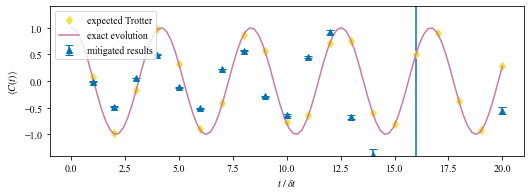

In [73]:
plt.figure(figsize=(8.5, 11 / 4))
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatanothing), yerr=gv.sdev(edatanothing), fmt='o', color=colors[0], capsize=5,
#              label='no mitigation')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edataro), yerr=gv.sdev(edataro), fmt='d', color=colors[1], capsize=5,
#              label='RO + PS')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand), yerr=gv.sdev(edatand), fmt='s', color=colors[2], capsize=5,
#              label='RO + PS + PT')
# # plt.errorbar(np.linspace(1, 20, 20), gv.mean(edatand_r), yerr=gv.sdev(edatand_r), fmt='x', 
# #              color=colors[3], capsize=4, label='RO+PS+PT+RS')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='^', 
             color=colors[5], capsize=4, label='mitigated results')
plt.plot(np.linspace(1, 20, 20), obs, 'd', color=colors[4], label='expected Trotter')
plt.plot(np.linspace(0, 20, 100), np.cos( 1.50611001 * np.linspace(0, 20, 100)),
         color=colors[7], label='exact evolution')
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(edata_r), yerr=gv.sdev(edata_r), fmt='d',
#              fillstyle='none', capsize=4, label='DD+PT+RS')
plt.ylim(-1.4, 1.4)
plt.legend()
plt.ylabel(r'$\langle C(t) \rangle$')
plt.xlabel(r'$t~ /~ \delta t$')
plt.savefig('3qubits_param2clean.pdf')
# plt.errorbar(np.linspace(1, 20, 20), np.mean(rescale_data, axis=0),
#              yerr=np.std(rescale_data, axis=0) / np.sqrt(30), fmt='.', capsize=4)
# plt.plot(evolution_data[1])
# plt.plot(rescale_data[1])

In [147]:
xdata = np.linspace(1, 20, 20)
ydata = edata_r * gv.gvar(np.ones(20), np.ones(20) * 0.02)
trim = 18
def fcn(x, p):
    return p[0] * gv.cos(p[1] * x) + p[2] * gv.cos(p[3] * x) + p[4] * gv.cos(p[5] * x)
fit = lsqfit.nonlinear_fit(data=(xdata[:trim], ydata[:trim]), fcn=fcn, p0=[1, 1.6, 0, 9, 0, 15])
print(fit)

Least Square Fit (no prior):
  chi2/dof [dof] = 3.7 [12]    Q = 1.6e-05    

Parameters:
              0    0.764 (46)     [   1 +- inf ]  
              1   1.6113 (45)     [ 1.6 +- inf ]  
              2   -0.094 (68)     [   0 +- inf ]  
              3     9.25 (14)     [   9 +- inf ]  
              4    0.037 (65)     [   0 +- inf ]  
              5    15.25 (31)     [  15 +- inf ]  

Settings:
  svdcut/n = 1e-12/0    tol = (1e-08,1e-10,1e-10*)    (itns/time = 30/0.0)
  fitter = scipy_least_squares    method = trf



In [66]:
evolution = np.zeros(20)
rescale = np.zeros(20)
for i in range(20):
    for key in scale_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            rescale[i] += scale_counts[i][key]
        else:
            rescale[i] -= scale_counts[i][key]
    for key in evolution_counts[i].keys():
        key2 = np.binary_repr(int(key, 16), width=3)
        if key2.count('1') % 2 == 1:
            evolution[i] += evolution_counts[i][key]
        else:
            evolution[i] -= evolution_counts[i][key]
rescale /= sum(scale_counts[0].values())
evolution /= sum(evolution_counts[0].values())

NameError: name 'scale_counts' is not defined

In [49]:
# plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='o', capsize=4, color=colors[0], label='dynamic decoupling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdatand), yerr=gv.sdev(rdatandro), fmt='d', capsize=4, color=colors[1], label='pauli-twirling')
plt.errorbar(np.linspace(1, 20, 20), gv.mean(rdata), yerr=gv.sdev(rdata), fmt='x', capsize=4, color=colors[2], label='dynamic decoupling')
plt.legend()
plt.savefig('rescaling.pdf')

NameError: name 'rdatand' is not defined